# Floral Data Processing

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

# **Loading Data**

In [2]:
GDS = pd.read_csv('GDS')

In [3]:
GDS.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date_x,Sender,Recipient,Product Total,Delivery_x,Nontaxable Delivery,...,Billing State,Billing Zip,Subtotal,Delivery_y,Sale Tax,Tip,Discount_y,Grand Total_y,Tax Exempt,Payment Method_y
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",Candyce Williams Glaser,NaN,$815.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$249.90,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$24.95,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",Tracie Hamilton,NaN,$635.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",Candyce Williams Glaser,Candyce Williams Glaser,$702.00,$0.00,$25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Exploration**

In [4]:
print("There are", GDS.isna().sum().sum(), "missing values.")

There are 1879164 missing values.


In [5]:
GDS.isna().sum()

Order #                      0
Transaction Type          5449
Order Time                5449
Order Date                5449
Delivery Date_x           5458
Sender                   24781
Recipient                30983
Product Total             5449
Delivery_x                5449
Nontaxable Delivery       5449
Wire Out Fee              5449
Discount_x                5449
Gift Cards                5449
Tax                       5449
Tips                      5449
Grand Total_x             5449
Payment Method_x          5449
Order Type                5640
Order Method              5449
Order Source             47467
Sale Date                47467
Delivery Date_y          47467
Order Status             47467
Delivery Method          47467
Product Name             47467
Item Number              52778
Card Message             47671
Card Signature           49999
Occasion                 48108
Customer Name            47467
Customer Phone           47467
Customer Email           47496
Recipien

In [6]:
GDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order #                52916 non-null  int64  
 1   Transaction Type       47467 non-null  object 
 2   Order Time             47467 non-null  object 
 3   Order Date             47467 non-null  object 
 4   Delivery Date_x        47458 non-null  object 
 5   Sender                 28135 non-null  object 
 6   Recipient              21933 non-null  object 
 7   Product Total          47467 non-null  object 
 8   Delivery_x             47467 non-null  object 
 9   Nontaxable Delivery    47467 non-null  object 
 10  Wire Out Fee           47467 non-null  object 
 11  Discount_x             47467 non-null  object 
 12  Gift Cards             47467 non-null  object 
 13  Tax                    47467 non-null  object 
 14  Tips                   47467 non-null  object 
 15  Gr

# **Data Cleaning**

In [7]:
#Dropping unnecessary columns
columns_to_drop = ['Delivery Street 2','Billing Street 2', 'Delivery_x', 'Delivery_y', 'Discount_y', 'Discount_x', 'Card Signature', 
                   'Card Message', 'Tips', 'Tip', 'Customer Email', 'Customer Phone', 'Delivery Address Type', 'Tax Exempt', 'Grand Total_y', 
                   'Item Number', 'Billing Phone', 'Delivery State', 'Delivery Date_y', 'Payment Method_y', 'Sale Tax', 'Billing Name', 
                   'Billing Street', 'Billing City', 'Billing State', 'Billing Zip', 'Recipient Phone', 'Order Status', 'Tax']
df = GDS.drop(columns_to_drop, axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order #              52916 non-null  int64  
 1   Transaction Type     47467 non-null  object 
 2   Order Time           47467 non-null  object 
 3   Order Date           47467 non-null  object 
 4   Delivery Date_x      47458 non-null  object 
 5   Sender               28135 non-null  object 
 6   Recipient            21933 non-null  object 
 7   Product Total        47467 non-null  object 
 8   Nontaxable Delivery  47467 non-null  object 
 9   Wire Out Fee         47467 non-null  object 
 10  Gift Cards           47467 non-null  object 
 11  Grand Total_x        47467 non-null  object 
 12  Payment Method_x     47467 non-null  object 
 13  Order Type           47276 non-null  object 
 14  Order Method         47467 non-null  object 
 15  Order Source         5449 non-null  

In [8]:
# Check for unique values
unique_counts = df.nunique()
print(unique_counts)

Order #                51426
Transaction Type           3
Order Time             41876
Order Date              1683
Delivery Date_x         1740
Sender                 11032
Recipient              14112
Product Total           5472
Nontaxable Delivery      390
Wire Out Fee              52
Gift Cards                22
Grand Total_x           9511
Payment Method_x          12
Order Type                 4
Order Method               5
Order Source               4
Sale Date               1434
Delivery Method            2
Product Name             535
Occasion                  37
Customer Name           3731
Recipient Name          4406
Delivery Street         4056
Delivery City             95
Delivery Zip              35
Subtotal                 157
dtype: int64


In [9]:
df['Transaction Type'].value_counts()

Sale          46068
Adjustment      981
Refund          418
Name: Transaction Type, dtype: int64

# **Creating the pipeline**

In [10]:
#Validation Split
X= df.drop(columns = 'Product Total')
y = df['Product Total']

In [11]:
#Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
#Construction of the pipeline
#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy= 'mean')

#Scaler
scaler = StandardScaler()

#OneHotEncoder
ohe =OneHotEncoder(handle_unknown='ignore', sparse=True)

#Create Selectors
cat_selector = make_column_selector(dtype_include= 'object')
num_selector = make_column_selector(dtype_include='number')

# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

#cat pipe
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe  

#Make tuples for preprocessing the categorical and numeric columns
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)

#Create Column Transformer
preprocessor= make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

#Fit Transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B34E442E0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B34E441F0>)])

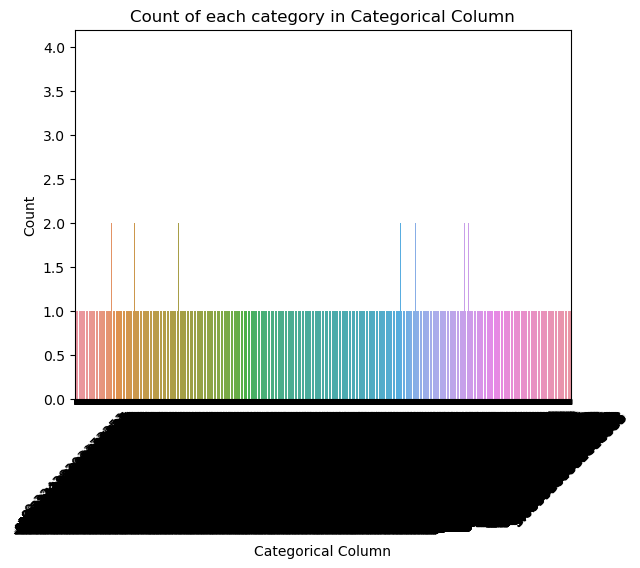

In [20]:
# Assuming you have the transformed data after applying the preprocessor
X_train_transformed = preprocessor.transform(X_train)
# Assuming 'categorical_column' is one of the categorical columns in your dataset
categorical_column_index = 0
# Extract the specific categorical column from the transformed data
categorical_column_values = X_train_transformed[:, categorical_column_index].toarray().ravel()
# Convert the categorical column to a pandas Series
categorical_column_series = pd.Series(categorical_column_values)
# Calculate the counts of each category
category_counts = categorical_column_series.value_counts()
# Create the bar plot
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.title('Count of each category in Categorical Column')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

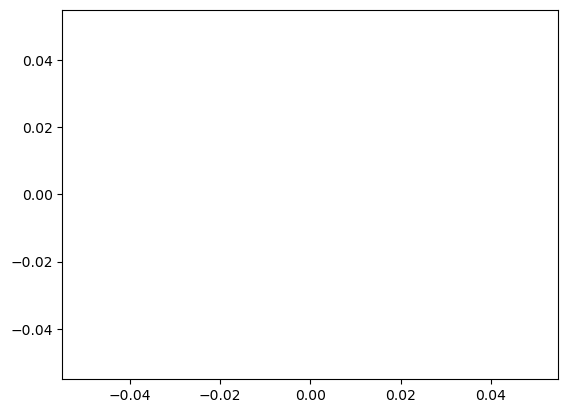

In [22]:
# Assuming you have the transformed data after applying the preprocessor
X_train_transformed = preprocessor.transform(X_train)

# Assuming 'numeric_column' is one of the numeric columns in your dataset
numeric_column_index = 0

# Extract the specific numeric column from the transformed data
numeric_column_values = X_train_transformed[:, numeric_column_index].toarray().ravel()
# Create the histogram
sns.histplot(numeric_column_values)
plt.xlabel('Numeric Column')
plt.ylabel('Frequency')
plt.titl